In [6]:
import spacy
from spacy import displacy
from spacy.matcher import DependencyMatcher

nlp = spacy.load('en_core_web_sm')

matcher = DependencyMatcher(nlp.vocab)

pattern = [
    # anchor: "root"
    {
        "RIGHT_ID": "root",
        "RIGHT_ATTRS": {"DEP": "ROOT"}
    },

    {
        "LEFT_ID": "root",
        "REL_OP": ">",
        "RIGHT_ID": "subject",
        "RIGHT_ATTRS": {"DEP": "nsubj"}
    },

    {
        "LEFT_ID": "root",
        "REL_OP": ">",
        "RIGHT_ID": "object",
        "RIGHT_ATTRS": {"DEP": "dobj"}
    }
]


#matcher.add("simple_root_triples", [pattern]) 

pattern = [
    # anchor: "root"
    {
        "RIGHT_ID": "verb",
        "RIGHT_ATTRS": {"POS": "VERB"}
    },

    {
        "LEFT_ID": "verb",
        "REL_OP": ">",
        "RIGHT_ID": "subject",
        "RIGHT_ATTRS": {"DEP": "nsubj"}
    },

    {
        "LEFT_ID": "verb",
        "REL_OP": ">",
        "RIGHT_ID": "object",
        "RIGHT_ATTRS": {"DEP": "dobj"}
    }
]

#matcher.add("simple_verb_triples", [pattern]) 


In [7]:
#doc = nlp("An entity shall account for a contract with a customer that is within the scope of this Standard only when all of the following criteria are met. The parties to the contract have approved the #contract (in writing, orally or in accordance with other customary business practices) and are committed to perform their respective obligations. The entity can identify each party's rights regarding the #goods or services to be transferred. The entity can identify the payment terms for the goods or services to be transferred. The contract has commercial substance (ie the risk, timing or amount of the #entity's future cash flows is expected to change as a result of the contract). It is probable that the entity will collect the consideration to which it will be entitled in exchange for the goods or services #that will be transferred to the customer. In evaluating whether collectability of an amount of consideration is probable, an entity shall consider only the customer's ability and intention to pay that amount #of consideration when it is due. The amount of consideration to which the entity will be entitled may be less than the price stated in the contract if the consideration is variable because the entity may #offer the customer a price concession (see paragraph 52).")

#doc = nlp("""An entity shall account for a contract with a customer that is within the scope of this Standard only when all of the following criteria are met:  (a)  the parties to the contract have approved the contract (in writing, orally or in accordance with other customary business practices) and are committed to perform their respective obligations;  (b) the entity can identify each party's rights regarding the goods or services to be transferred; (c) the entity can identify the payment terms for the goods or services to be transferred; (d) the contract has commercial substance (ie the risk, timing or amount of the entity's future cash flows is expected to change as a result of the contract); and (e) it is probable that the entity will collect the consideration to which it will be entitled in exchange for the goods or services that will be transferred to the customer. In evaluating whether collectability of an amount of consideration is probable, an entity shall consider only the customer's ability and intention to pay that amount of consideration when it is due. The amount of consideration to which the entity will be entitled may be less than the price stated in the contract if the consideration is variable because the entity may offer the customer a price concession (see paragraph 52).""")

with open("./15_knowgraph_paragraphs.txt", encoding="utf-8") as f:
   doc = nlp(' '.join(f.readlines()))   # all paragraphs used in manual KG
   #doc = nlp(f.readline())    # just para. 9


#for sent in doc.sents:
#    print(sent.text, "\n")

#options = {"compact": True, 
#           "distance": 80,
#           "collapse_phrases": True}
#sent_spans = list(doc.sents)

#svg = displacy.render(sent_spans[1], jupyter=True, style="dep", options=options)

#for word in sent_spans[1]:
#   print(word.text, "\t\t", word.dep_, "--", spacy.explain(word.dep_))



In [11]:
print(doc)

An entity shall account for a contract with a customer that is within the scope of this Standard only when all of the following criteria are met:  the parties to the contract have approved the contract (in writing, orally or in accordance with other customary business practices) and are committed to perform their respective obligations; the entity can identify each party's rights regarding the goods or services to be transferred; the entity can identify the payment terms for the goods or services to be transferred; the contract has commercial substance (ie the risk, timing or amount of the entity's future cash flows is expected to change as a result of the contract); and it is probable that the entity will collect the consideration to which it will be entitled in exchange for the goods or services that will be transferred to the customer. In evaluating whether collectability of an amount of consideration is probable, an entity shall consider only the customer's ability and intention to

# Extract triples

In [8]:
import numpy as np

matches = matcher(doc)
print(matches)

subjects = [doc[x[1][1]].text for x in matches]
print(subjects)

predicates = [doc[x[1][0]].text for x in matches]
print(predicates)

objects = [doc[x[1][2]].text for x in matches]
print(objects)

nodes = objects + subjects

print(nodes)
print(list(set(nodes)))


# matches(,[1])

#for id, indexes in matches:
#    print("Subject: ", doc[indexes[1]], 
#    " Predicate: ", doc[indexes[0]],
#    "Object: ", doc[indexes[2]])



[]
[]
[]
[]
[]
[]


# Assemble edges

In [9]:
edges = list(zip(subjects, objects))
print(edges)

labels = {edges[i]: predicates[i] for i in range(len(edges))}
print(labels)



[]
{}


# Create a graph

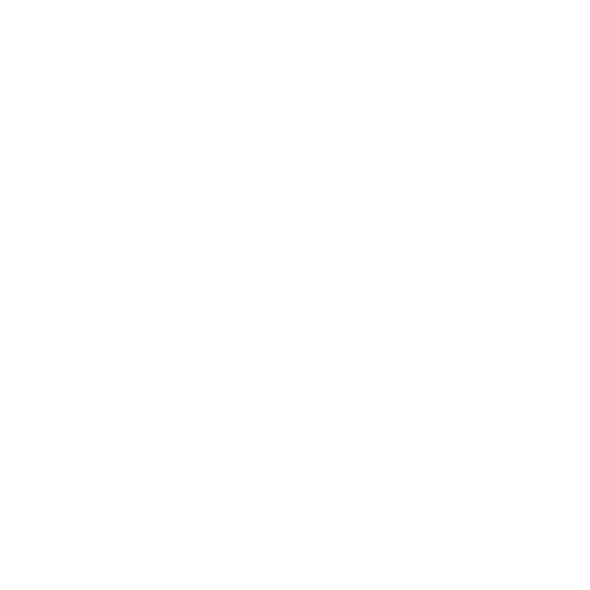

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=.95, scale=1.25, center = (0,0))
plt.figure(3, figsize=(8,8))    
nx.draw(G,pos,edge_color='black',width=2,linewidths=.5,\
node_size=1000,node_color='pink',alpha=0.9, \
labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_color='red')

#nx.draw_networkx_edge_labels(G,pos,edge_labels={('A','B'):'AB',\
#('B','C'):'BC',('B','D'):'BD'},font_color='red')
plt.axis('off')
#plt.show()
plt.savefig("spacy_graph.png", format = "PNG")

# End Here
# End Here
# End Here

In [6]:
import spacy
from spacy.matcher import DependencyMatcher

nlp = spacy.load('en_core_web_sm')


def get_relation(sent):

    matcher = DependencyMatcher(nlp.vocab)
    doc = nlp(sent)  
    
    pattern = [
        # anchor: "root"
        {
            "RIGHT_ID": "root",
            "RIGHT_ATTRS": {"DEP": "ROOT"}
        },

        {
            "LEFT_ID": "root",
            "REL_OP": ">",
            "RIGHT_ID": "subject",
            "RIGHT_ATTRS": {"DEP": "nsubj"}
        },

        {
            "LEFT_ID": "root",
            "REL_OP": ">",
            "RIGHT_ID": "object",
            "RIGHT_ATTRS": {"DEP": "dobj"}
        }
    ]

    matcher.add("bob", [pattern]) 

    matches = matcher(doc)
    k = len(matches) - 1

    print(matches)

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)


In [7]:
get_relation(doc)

TypeError: Argument 'string' has incorrect type (expected str, got spacy.tokens.doc.Doc)

In [38]:
from spacy.tokenizer import Tokenizer
from spacy.language import Language
import re

nlp = spacy.load('en_core_web_sm')

bulleted_prefix = r'\(\w\)'

prefix_re = spacy.util.compile_prefix_regex(tuple(list(nlp.Defaults.prefixes) + [bulleted_prefix]))

nlp.tokenizer.prefix_search = prefix_re.search

@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
    pattern = re.compile(r':|;|\(\w\)')
    for token in doc[:-1]:
        if pattern.match(token.text):
            doc[token.i + 1].is_sent_start = True
    return doc


nlp.add_pipe("set_custom_boundaries", before="parser")


doc = nlp("""
An entity shall account for a contract with a customer that is within the scope of this Standard only when all of the following criteria are met:  (a)  the parties to the contract have approved the contract (in writing, orally or in accordance with other customary business practices) and are committed to perform their respective obligations;  (b) the entity can identify each party's rights regarding the goods or services to be transferred; (c) the entity can identify the payment terms for the goods or services to be transferred; (d) the contract has commercial substance (ie the risk, timing or amount of the entity's future cash flows is expected to change as a result of the contract); and (e) it is probable that the entity will collect the consideration to which it will be entitled in exchange for the goods or services that will be transferred to the customer. In evaluating whether collectability of an amount of consideration is probable, an entity shall consider only the customer's ability and intention to pay that amount of consideration when it is due. The amount of consideration to which the entity will be entitled may be less than the price stated in the contract if the consideration is variable because the entity may offer the customer a price concession (see paragraph 52).
""")

for sent in doc.sents:
    print(sent.text, "\n")





 

An entity shall account for a contract with a customer that is within the scope of this Standard only when all of the following criteria are met: 

  

(a)  the parties to the contract have approved the contract (in writing, orally or in accordance with other customary business practices) and are committed to perform their respective obligations; 

 (b) the entity can identify each party's rights regarding the goods or services to be transferred; 

(c) the entity can identify the payment terms for the goods or services to be transferred; 

(d) the contract has commercial substance (ie the risk, timing or amount of the entity's future cash flows is expected to change as a result of the contract); 

and 

(e) it is probable that the entity will collect the consideration to which it will be entitled in exchange for the goods or services that will be transferred to the customer. 

In evaluating whether collectability of an amount of consideration is probable, an entity shall consider o

In [70]:
from spacy.language import Language
import spacy

text = "this is a sentence...hello...and another sentence."

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
print("Before:", [sent.text for sent in doc.sents])

@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == "...":
            doc[token.i + 1].is_sent_start = True
    return doc

nlp.add_pipe("set_custom_boundaries", before="parser")
doc = nlp(text)
print("After:", [sent.text for sent in doc.sents])

Before: ['this is a sentence...hello...and another sentence.']
After: ['this is a sentence...', 'hello...', 'and another sentence.']


In [96]:
doc = nlp("An entity shall account for a contract with a customer that is within the scope of this Standard only when all of the following criteria are met. The parties to the contract have approved the contract (in writing, orally or in accordance with other customary business practices) and are committed to perform their respective obligations. The entity can identify each party's rights regarding the goods or services to be transferred. The entity can identify the payment terms for the goods or services to be transferred. The contract has commercial substance (ie the risk, timing or amount of the entity's future cash flows is expected to change as a result of the contract). It is probable that the entity will collect the consideration to which it will be entitled in exchange for the goods or services that will be transferred to the customer. In evaluating whether collectability of an amount of consideration is probable, an entity shall consider only the customer's ability and intention to pay that amount of consideration when it is due. The amount of consideration to which the entity will be entitled may be less than the price stated in the contract if the consideration is variable because the entity may offer the customer a price concession (see paragraph 52).")